In [1]:
import keras
from keras import layers

In [3]:
inputs = keras.Input(shape=(180,180,3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(256, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(256, 3, activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model=keras.Model(inputs, outputs)

In [4]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
from keras.utils import image_dataset_from_directory

train_ds = image_dataset_from_directory("C:/Users/danie/Downloads/train", labels='inferred', label_mode='binary', image_size=(180, 180), batch_size=32)
val_ds = image_dataset_from_directory("C:/Users/danie/Downloads/validation", labels='inferred', label_mode='binary', image_size=(180, 180), batch_size=32)
test_ds = image_dataset_from_directory("C:/Users/danie/Downloads/test", labels='inferred', label_mode='binary', image_size=(180, 180), batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 232ms/step - accuracy: 0.5122 - loss: 0.6954 - val_accuracy: 0.5000 - val_loss: 0.6917
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 210ms/step - accuracy: 0.5155 - loss: 0.6866 - val_accuracy: 0.5720 - val_loss: 0.6710
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 209ms/step - accuracy: 0.5996 - loss: 0.6660 - val_accuracy: 0.5730 - val_loss: 0.6969
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 211ms/step - accuracy: 0.6097 - loss: 0.6448 - val_accuracy: 0.6260 - val_loss: 0.6492
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 212ms/step - accuracy: 0.6492 - loss: 0.6154 - val_accuracy: 0.6730 - val_loss: 0.5975
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 210ms/step - accuracy: 0.7060 - loss: 0.5661 - val_accuracy: 0.6780 - val_loss: 0.5956
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 210ms/step - accuracy: 0.6877 - loss: 0.5851 - val_accuracy: 0.6780 - val_loss: 0.6395
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 210ms/step - accuracy: 0.7117 - loss: 0.5659 - val_accu

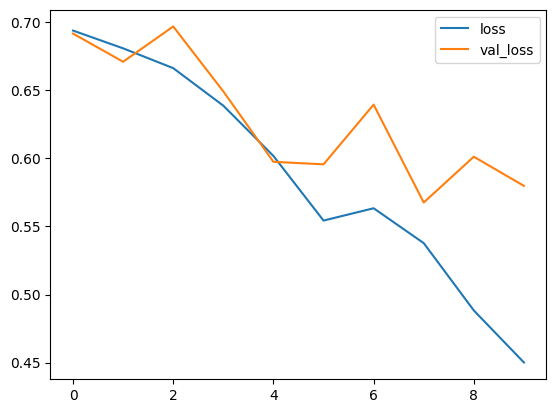

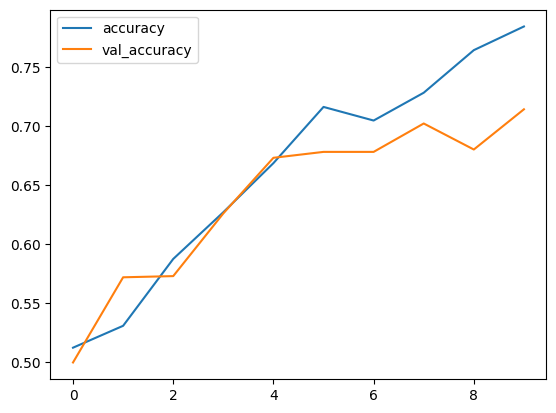

In [12]:
import my_functions
import matplotlib.pyplot as plt

my_functions.plot_metrics_2(model.history.history)

Nedan 

In [ ]:
keras.models.load_

#### Data augmentation:

In [16]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

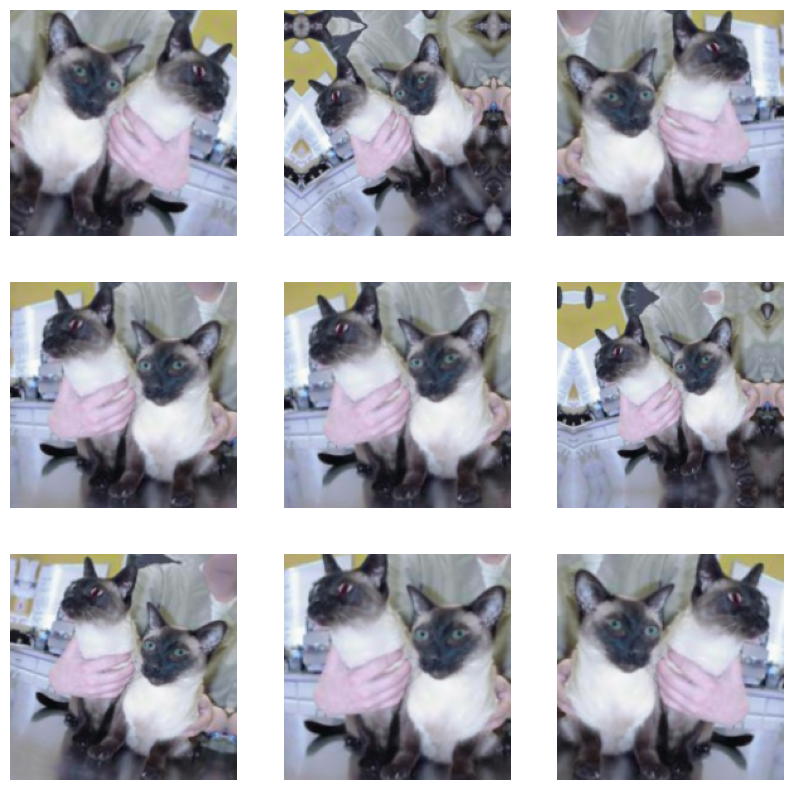

In [18]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

Nytt conv net, inkluderar både data augmentation och drop out layer.

In [19]:
input = keras.Input(shape=(180, 180, 3))
x = data_augmentation(input) # Apply data augmentation, börjar vårt närverk med att göra data augmentation
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(128,3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(256,3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(256,3, activation='relu')(x)
x = layers.Flatten()(x) # Flatten för att göra det till en vektor
x = layers.Dropout(0.5)(x) # Dropout för att undvika overfitting
outputs = layers.Dense(1, activation='sigmoid')(x)  # Sigmoid för att vi har en binär klassificering

In [ ]:
model = keras.Model(input, outputs)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

<Functional name=functional_3, built=True>

In [27]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model_augment_dropout.keras',
        save_best_only=True,
        monitor='val_loss',
    )
]

In [29]:
history = model.fit(train_ds, validation_data=val_ds, epochs=80, callbacks=callbacks)

Epoch 1/80
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 236ms/step - accuracy: 0.5376 - loss: 0.6906 - val_accuracy: 0.5130 - val_loss: 0.6871
Epoch 2/80
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 231ms/step - accuracy: 0.5428 - loss: 0.6887 - val_accuracy: 0.5310 - val_loss: 0.6894
Epoch 3/80
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 232ms/step - accuracy: 0.6028 - loss: 0.6671 - val_accuracy: 0.5690 - val_loss: 0.7353
Epoch 4/80
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 232ms/step - accuracy: 0.6157 - loss: 0.6662 - val_accuracy: 0.5940 - val_loss: 0.6928
Epoch 5/80
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 236ms/step - accuracy: 0.6439 - loss: 0.6298 - val_accuracy: 0.5370 - val_loss: 0.8936
Epoch 6/80
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 237ms/step - accuracy: 0.6421 - loss: 0.6443 - val_accuracy: 0.6660 - val_loss: 0.5980
Epoch 7/80
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 235ms/step - accuracy: 0.6751 - loss: 0.5891 - val_accuracy: 0.6310 - val_loss: 0.6238
Epoch 8/80
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 237ms/step - accuracy: 0.6927 - loss: 0.5933 - val_accu

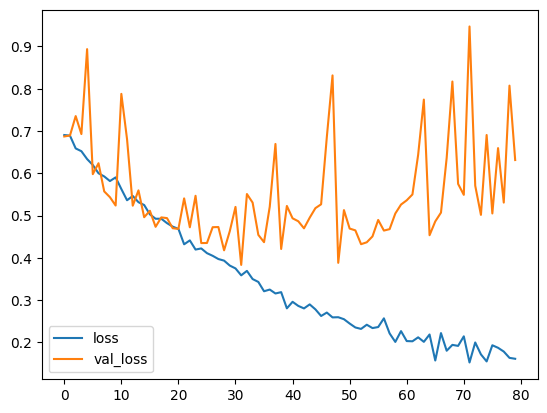

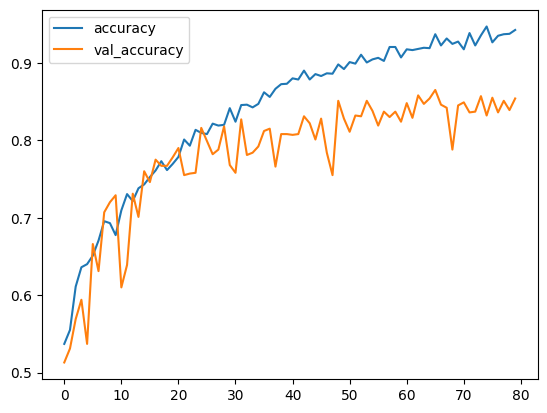

In [30]:
my_functions.plot_metrics_2(model.history.history)

Här ska man ladda in sin bästa modell först:

In [32]:
test_model = keras.models.load_model('best_model_augment_dropout.keras')
test_loss, test_acc = test_model.evaluate(test_ds)
print('\nTest accuracy:', test_acc)

63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.8128 - loss: 0.4253

Test accuracy: 0.8134999871253967


In [31]:
print(model.evaluate(test_ds))

63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.8464 - loss: 0.6388
[0.6406616568565369, 0.8500000238418579]


In [33]:
conv_base = keras.applications.vgg16.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3)
    )

In [34]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 180, 180, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 90, 90, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 45, 45, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 22, 22, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 22, 22, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 11, 11, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 5, 5, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

Funktionen nedan.....?

In [39]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for image, labels in dataset:
        preproceed_images = keras.applications.vgg16.preprocess_input(image)
        features = conv_base.predict(preproceed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

In [41]:
train_features, train_labels = get_features_and_labels(train_ds)
val_features, val_labels = get_features_and_labels(val_ds)
test_features, test_labels = get_features_and_labels(test_ds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 880ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 875ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 888ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 859ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 879ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 878ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 867ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 861ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 875ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 881ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 887ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 890ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 886ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 874ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 868ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 883ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 900ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 891ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 857ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 867ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 901ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 879ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 879ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 876ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 874ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

Vi gör vår egna klassificerare:

In [46]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
callbacks = [keras.callbacks.ModelCheckpoint(
    filepath='feature_extraction.keras',
    save_best_only=True,
    monitor='val_loss'
)]

In [47]:
model.build(input_shape=(None, 5, 5, 512))
history = model.fit(train_features, train_labels, validation_data=(val_features, val_labels), epochs=20, callbacks=callbacks)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8600 - loss: 11.4768 - val_accuracy: 0.9690 - val_loss: 0.9328
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9785 - loss: 0.7879 - val_accuracy: 0.9720 - val_loss: 0.6234
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9757 - loss: 0.5969 - val_accuracy: 0.9770 - val_loss: 0.7951
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9823 - loss: 0.6802 - val_accuracy: 0.9710 - val_loss: 0.9006
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9860 - loss: 0.3548 - val_accuracy: 0.9780 - val_loss: 0.6528
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9976 - loss: 0.0635 - val_accuracy: 0.9780 - val_loss: 0.8208
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9970 - loss: 0.0747 - val_accuracy: 0.9840 - val_loss: 0.6668
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9957 - loss: 0.0963 - val_accuracy: 0.9840 - 

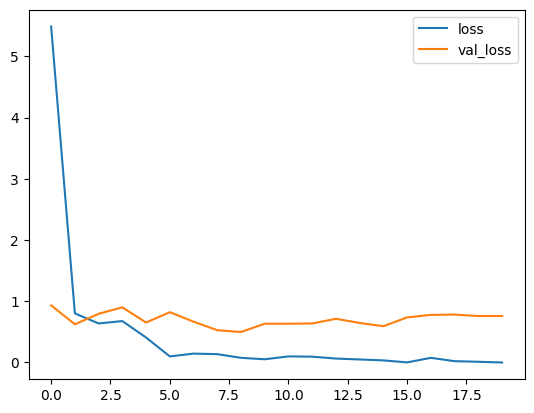

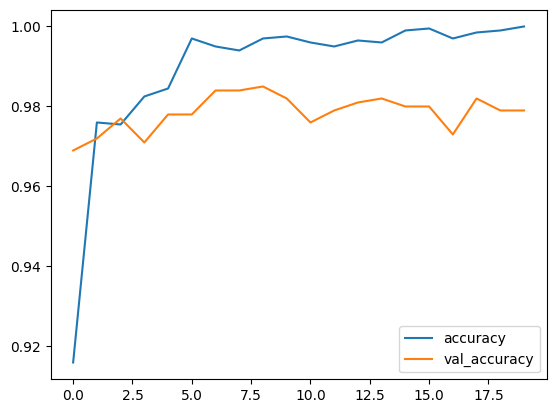

In [51]:
import pandas as pd
my_functions.plot_metrics_2(pd.DataFrame(model.history.history))


In [54]:
test_loss, test_acc = model.evaluate(test_features, test_labels)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9706 - loss: 1.3870

Test accuracy: 0.9739999771118164

Test loss: 1.1084734201431274


Ett förtränat nätverk ger 97% accuracy.